In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load PFI data

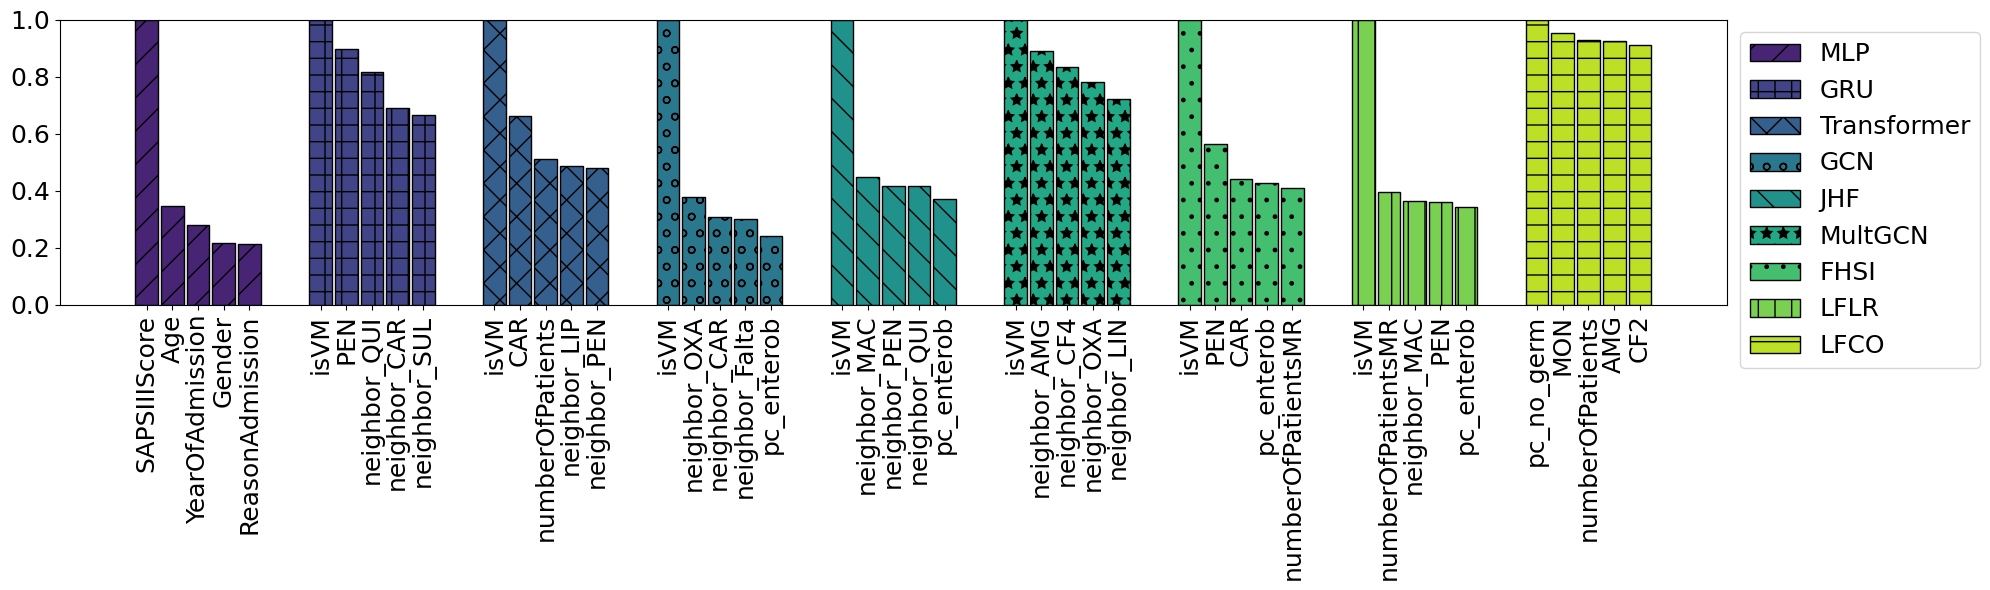

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For scientific color palettes

# Function to normalize importance values for each model
def normalize_importance(df):
    df['normalized_importance'] = (df['mean_importance'] - df['mean_importance'].min()) / (df['mean_importance'].max() - df['mean_importance'].min())
    return df

# Load CSV files
pfi_gru = pd.read_csv('./Results_GRU/PFI_GRU.csv')
pfi_fhsi = pd.read_csv('./Results_FHSI/PFI_FHSI.csv')
pfi_lfco = pd.read_csv('./Results_LFCO/PFI_LFCO.csv')
pfi_lflr = pd.read_csv('./Results_LFLR/PFI_LFLR.csv')
pfi_jhf = pd.read_csv('./Results_JHF/PFI_JHF.csv')
pfi_mlp = pd.read_csv('./Results_MLP/PFI_MLP.csv')
pfi_trans = pd.read_csv('./Results_Transformer/PFI_Transformer.csv')
pfi_gcn = pd.read_csv('./Results_GNN/PFI_GNN.csv')
pfi_multgcn = pd.read_csv('./Results_MultGNN/PFI_MultGNN.csv')

# Normalize importance for each model
df_gru = normalize_importance(pfi_gru)
df_fhsi = normalize_importance(pfi_fhsi)
df_lfco = normalize_importance(pfi_lfco)
df_lflr = normalize_importance(pfi_lflr)
df_jhf = normalize_importance(pfi_jhf)
df_mlp = normalize_importance(pfi_mlp)
df_trans = normalize_importance(pfi_trans)
df_gcn = normalize_importance(pfi_gcn)
df_multgcn = normalize_importance(pfi_multgcn)

# Sort by normalized importance and select top 5 features
def sort_top_features(df):
    return df.sort_values(by='normalized_importance', ascending=False).head(5)

df_sorted = { 
    'MLP': sort_top_features(df_mlp), 'GRU': sort_top_features(df_gru), 'Transformer': sort_top_features(df_trans), 
    'GCN': sort_top_features(df_gcn), 'JHF': sort_top_features(df_jhf), 'MultGCN': sort_top_features(df_multgcn), 
    'FHSI': sort_top_features(df_fhsi), 'LFLR': sort_top_features(df_lflr), 'LFCO': sort_top_features(df_lfco) 
}

# Add model column
for model, df in df_sorted.items():
    df['model'] = model

# Combine all DataFrames
df_combined = pd.concat(df_sorted.values())

# Plot setup
plt.figure(figsize=(20, 6))

# Adjust bar settings
bar_width = 3
gap = 20
inner_gap = 0.4
n_models = len(df_sorted)
n_features = 5

# Compute bar positions
bar_positions = [
    (bar_width + inner_gap) * feature_index + (bar_width + gap) * model_index
    for model_index in range(n_models)
    for feature_index in range(n_features)
]

# Feature names for labels
feature_names = sum((df['features_dyn'].tolist() if 'features_dyn' in df.columns else df['features'].tolist() for df in df_sorted.values()), [])

# Use a scientific color palette
colors = sns.color_palette("viridis", n_models)  # Updated to "viridis" for better scientific presentation

# Hatch patterns
hatch_patterns = ['/', '+', 'x', 'o', '\\', '*', '.', '|', '-']

# Plot bars
for model_index, (model, model_data) in enumerate(df_sorted.items()):
    plt.bar(
        bar_positions[model_index * n_features : (model_index + 1) * n_features],
        model_data['normalized_importance'],
        bar_width,
        hatch=hatch_patterns[model_index],
        color=colors[model_index],
        edgecolor='black',
        label=model
    )

# X-axis labels
plt.xticks(bar_positions, feature_names, rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 1)

# Legend
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))

# Save and show plot
plt.tight_layout()
plt.savefig('ranking_pfi_updated.pdf', format='pdf', bbox_inches='tight', dpi=100)
plt.show()


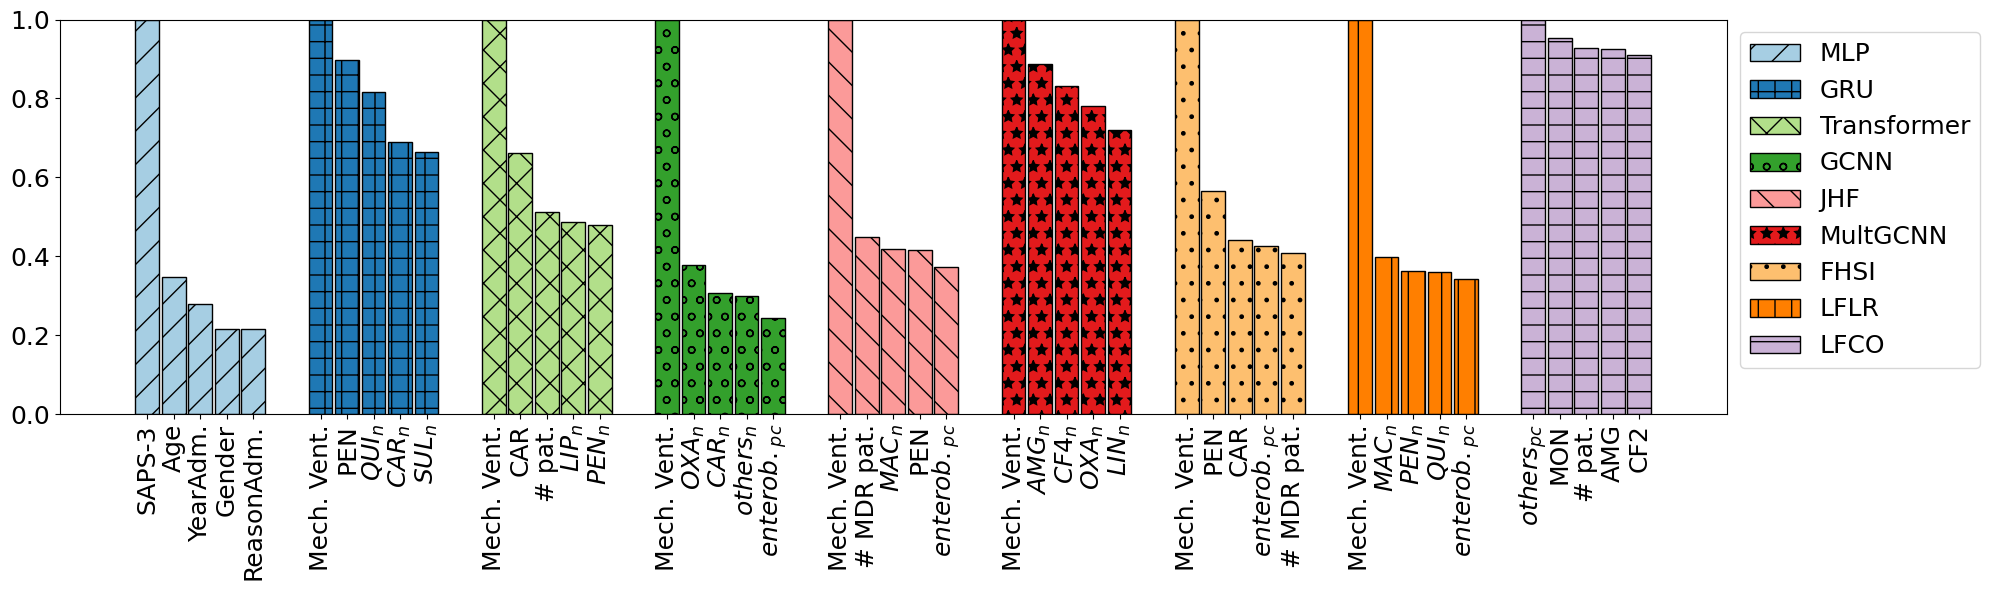

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For scientific color palettes

# Function to normalize importance values for each model
def normalize_importance(df):
    df['normalized_importance'] = (df['mean_importance'] - df['mean_importance'].min()) / (df['mean_importance'].max() - df['mean_importance'].min())
    return df

# Load CSV files
pfi_gru = pd.read_csv('./Results_GRU/PFI_GRU.csv')
pfi_fhsi = pd.read_csv('./Results_FHSI/PFI_FHSI.csv')
pfi_lfco = pd.read_csv('./Results_LFCO/PFI_LFCO.csv')
pfi_lflr = pd.read_csv('./Results_LFLR/PFI_LFLR.csv')
pfi_jhf = pd.read_csv('./Results_JHF/PFI_JHF.csv')
pfi_mlp = pd.read_csv('./Results_MLP/PFI_MLP.csv')
pfi_trans = pd.read_csv('./Results_Transformer/PFI_Transformer.csv')
pfi_gcn = pd.read_csv('./Results_GNN/PFI_GNN.csv')
pfi_multgcn = pd.read_csv('./Results_MultGNN/PFI_MultGNN.csv')

# Normalize importance for each model
df_gru = normalize_importance(pfi_gru)
df_fhsi = normalize_importance(pfi_fhsi)
df_lfco = normalize_importance(pfi_lfco)
df_lflr = normalize_importance(pfi_lflr)
df_jhf = normalize_importance(pfi_jhf)
df_mlp = normalize_importance(pfi_mlp)
df_trans = normalize_importance(pfi_trans)
df_gcn = normalize_importance(pfi_gcn)
df_multgcn = normalize_importance(pfi_multgcn)

# Sort by normalized importance and select top 5 features
def sort_top_features(df):
    return df.sort_values(by='normalized_importance', ascending=False).head(5)

df_sorted = { 
    'MLP': sort_top_features(df_mlp), 'GRU': sort_top_features(df_gru), 'Transformer': sort_top_features(df_trans), 
    'GCNN': sort_top_features(df_gcn), 'JHF': sort_top_features(df_jhf), 'MultGCNN': sort_top_features(df_multgcn), 
    'FHSI': sort_top_features(df_fhsi), 'LFLR': sort_top_features(df_lflr), 'LFCO': sort_top_features(df_lfco) 
}

# Add model column
for model, df in df_sorted.items():
    df['model'] = model

# Combine all DataFrames
df_combined = pd.concat(df_sorted.values())

# Plot setup
plt.figure(figsize=(20, 6))

# Adjust bar settings
bar_width = 3.5
gap = 22
inner_gap = 0.4
n_models = len(df_sorted)
n_features = 5

# Compute bar positions
bar_positions = [
    (bar_width + inner_gap) * feature_index + (bar_width + gap) * model_index
    for model_index in range(n_models)
    for feature_index in range(n_features)
]

# Feature names for labels
keys = ['SAPS-3', 'Age', 'YearAdm.', 'Gender', 'ReasonAdm.', #MLP
        
        'Mech. Vent.', 'PEN', r'$QUI_{n}$', r'$CAR_{n}$', r'$SUL_{n}$', #GRU
        
        'Mech. Vent.', 'CAR', '# pat.', r'$LIP_{n}$', r'$PEN_{n}$', #Transformer

        'Mech. Vent.',  r'$OXA_{n}$',  r'$CAR_{n}$',  r'$others_{n}$', r'$enterob._{pc}$', #GNN 
        
        'Mech. Vent.', '# MDR pat.',  r'$MAC_{n}$', 'PEN', r'$enterob._{pc}$', # JHF

        'Mech. Vent.', r'$AMG_{n}$', r'$CF4_{n}$', r'$OXA_{n}$', r'$LIN_{n}$', #MultGCNN
        
        'Mech. Vent.', 'PEN', 'CAR', r'$enterob._{pc}$', '# MDR pat.', #FHSI 
        
        'Mech. Vent.',  r'$MAC_{n}$', r'$PEN_{n}$', r'$QUI_{n}$', r'$enterob._{pc}$', #LFLR
        
        r'$others_{pc}$', 'MON', '# pat.', 'AMG', 'CF2', #LFCO 

       ]

# Use a scientific color palette
colors = sns.color_palette("Paired", n_models)  # More formal scientific palette

# Hatch patterns
hatch_patterns = ['/', '+', 'x', 'o', '\\', '*', '.', '|', '-']

# Plot bars
for model_index, (model, model_data) in enumerate(df_sorted.items()):
    plt.bar(
        bar_positions[model_index * n_features : (model_index + 1) * n_features],
        model_data['normalized_importance'],
        bar_width,
        hatch=hatch_patterns[model_index],
        color=colors[model_index],
        edgecolor='black',
        label=model
    )

# X-axis labels
plt.xticks(bar_positions, keys, rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 1)

# Legend
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))

# Save and show plot
plt.tight_layout()
plt.savefig('ranking_pfi_updated.pdf', format='pdf', bbox_inches='tight', dpi=100)
plt.show()


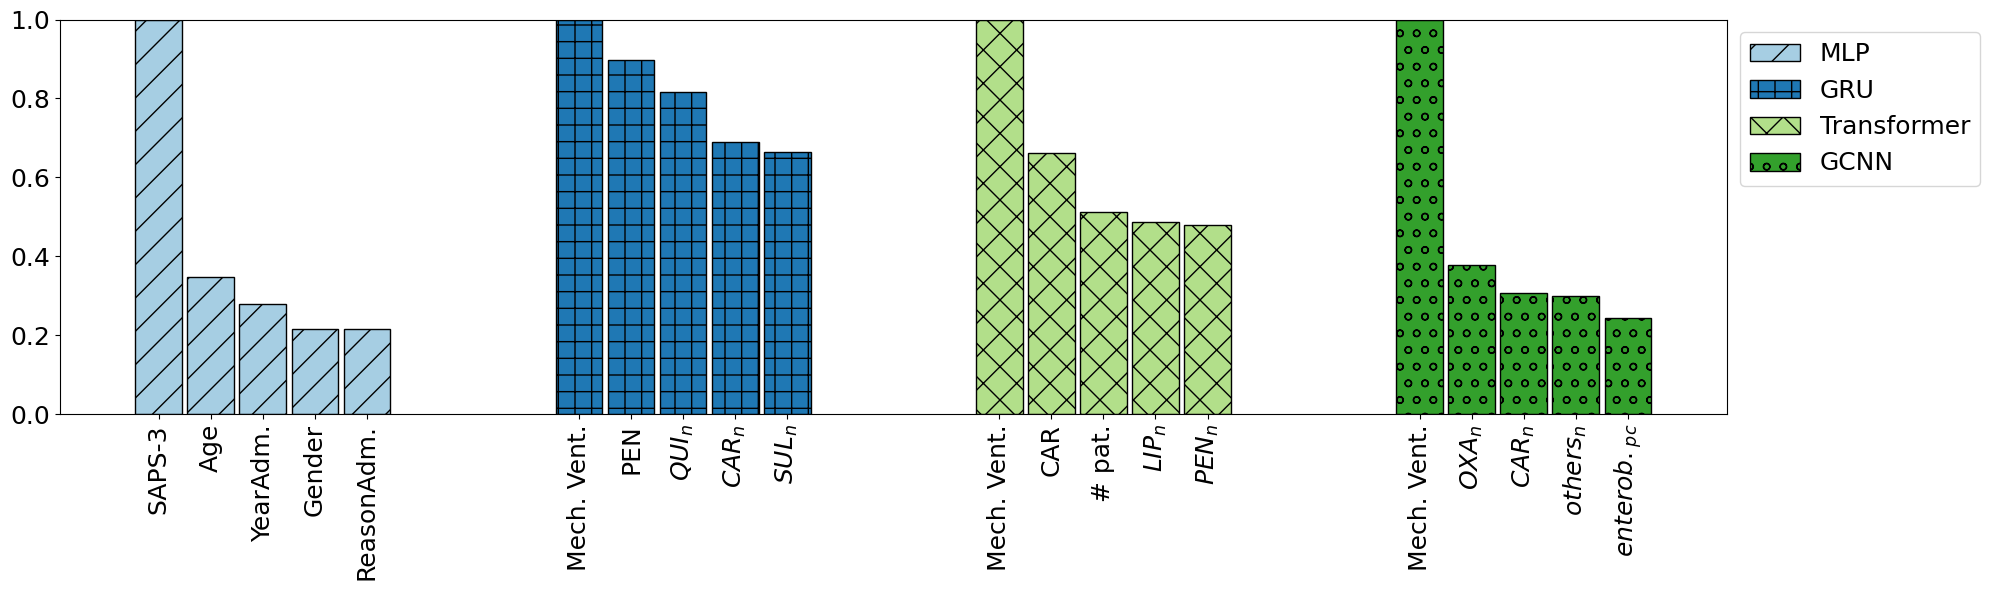

In [4]:
df_sorted = { 
    'MLP': sort_top_features(df_mlp), 'GRU': sort_top_features(df_gru), 'Transformer': sort_top_features(df_trans), 
    'GCNN': sort_top_features(df_gcn)
}

# Add model column
for model, df in df_sorted.items():
    df['model'] = model

# Combine all DataFrames
df_combined = pd.concat(df_sorted.values())

# Plot setup
plt.figure(figsize=(20, 6))

# Adjust bar settings
bar_width = 3.5
gap = 28
inner_gap = 0.4
n_models = len(df_sorted)
n_features = 5

# Compute bar positions
bar_positions = [
    (bar_width + inner_gap) * feature_index + (bar_width + gap) * model_index
    for model_index in range(n_models)
    for feature_index in range(n_features)
]

# Feature names for labels
keys = ['SAPS-3', 'Age', 'YearAdm.', 'Gender', 'ReasonAdm.', #MLP
        'Mech. Vent.', 'PEN', r'$QUI_{n}$', r'$CAR_{n}$', r'$SUL_{n}$', #GRU
        
        'Mech. Vent.', 'CAR', '# pat.', r'$LIP_{n}$', r'$PEN_{n}$', #Transformer

        'Mech. Vent.',  r'$OXA_{n}$',  r'$CAR_{n}$',  r'$others_{n}$', r'$enterob._{pc}$', #GNN 

       ]

# Use a scientific color palette
colors = sns.color_palette("Paired", n_models)  # More formal scientific palette

# Hatch patterns
hatch_patterns = ['/', '+', 'x', 'o']

# Plot bars
for model_index, (model, model_data) in enumerate(df_sorted.items()):
    plt.bar(
        bar_positions[model_index * n_features : (model_index + 1) * n_features],
        model_data['normalized_importance'],
        bar_width,
        hatch=hatch_patterns[model_index],
        color=colors[model_index],
        edgecolor='black',
        label=model
    )

# X-axis labels
plt.xticks(bar_positions, keys, rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 1)

# Legend
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))

# Save and show plot
plt.tight_layout()
plt.savefig('ranking_pfi_nonmult.pdf', format='pdf', bbox_inches='tight', dpi=100)
plt.show()


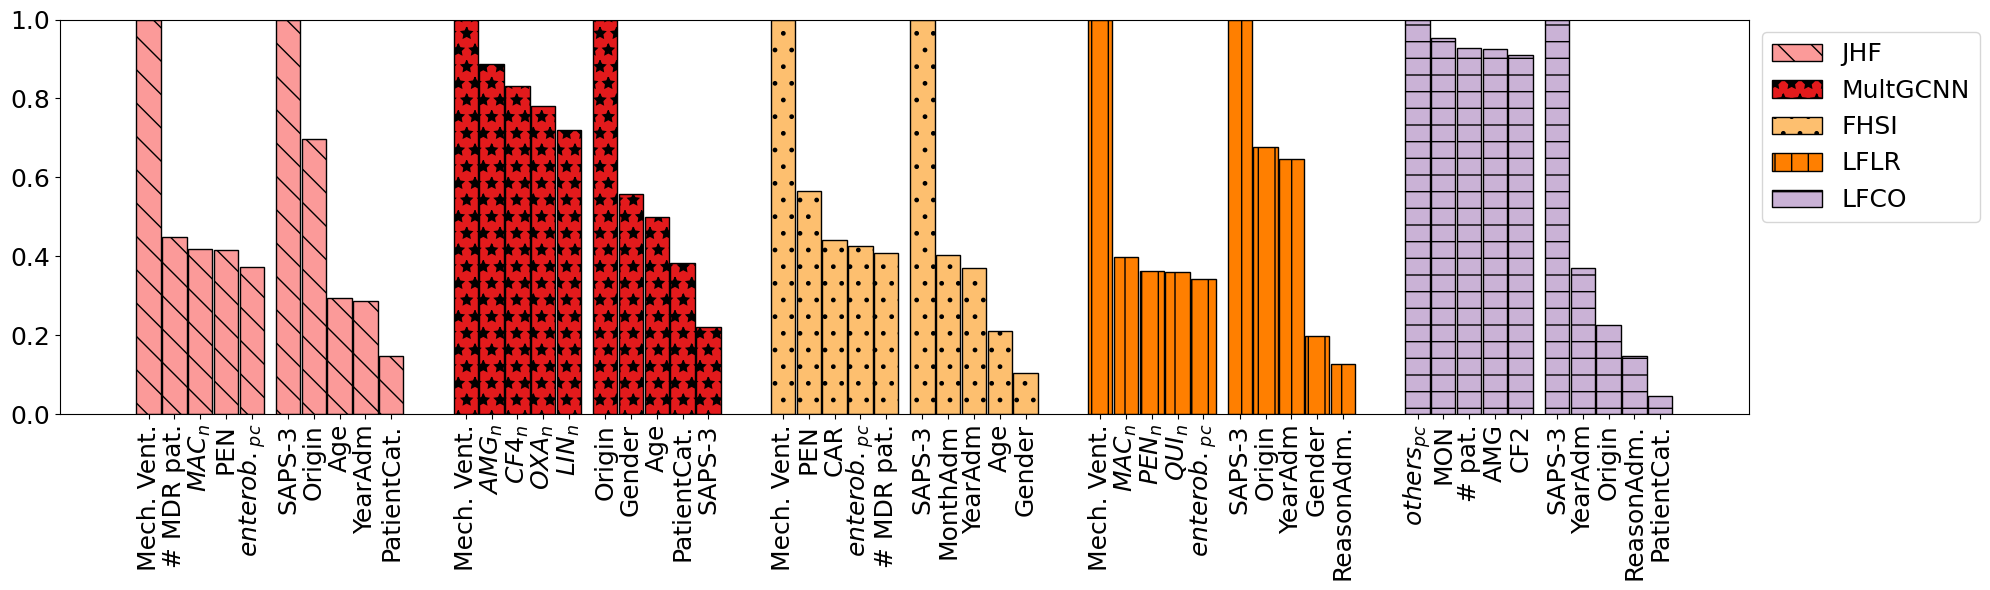

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For scientific color palettes

# Function to normalize importance values for each model
def normalize_importance(df):
    df['normalized_importance'] = (df['mean_importance'] - df['mean_importance'].min()) / (df['mean_importance'].max() - df['mean_importance'].min())
    return df

# Load CSV files for temporal features
pfi_fhsi = pd.read_csv('./Results_FHSI/PFI_FHSI.csv')
pfi_lfco = pd.read_csv('./Results_LFCO/PFI_LFCO.csv')
pfi_lflr = pd.read_csv('./Results_LFLR/PFI_LFLR.csv')
pfi_jhf = pd.read_csv('./Results_JHF/PFI_JHF.csv')
pfi_multgcn = pd.read_csv('./Results_MultGNN/PFI_MultGNN.csv')

# Load CSV files for static features
pfi_fhsi_static = pd.read_csv('./Results_FHSI/PFI_FHSI_static.csv')
pfi_lfco_static = pd.read_csv('./Results_LFCO/PFI_LFCO_static.csv')
pfi_lflr_static = pd.read_csv('./Results_LFLR/PFI_LFLR_static.csv')
pfi_jhf_static = pd.read_csv('./Results_JHF/PFI_JHF_static.csv')
pfi_multgcn_static = pd.read_csv('./Results_MultGNN/PFI_MultGNN_static.csv')

# Normalize importance for each model (temporal and static)
df_fhsi = normalize_importance(pfi_fhsi)
df_lfco = normalize_importance(pfi_lfco)
df_lflr = normalize_importance(pfi_lflr)
df_jhf = normalize_importance(pfi_jhf)
df_mlp = normalize_importance(pfi_mlp)
df_multgcn = normalize_importance(pfi_multgcn)

df_fhsi_static = normalize_importance(pfi_fhsi_static)
df_lfco_static = normalize_importance(pfi_lfco_static)
df_lflr_static = normalize_importance(pfi_lflr_static)
df_jhf_static = normalize_importance(pfi_jhf_static)
df_multgcn_static = normalize_importance(pfi_multgcn_static)

# Sort by normalized importance and select top 3 static and top 5 temporal features
def sort_top_features(df, n_features):
    return df.sort_values(by='normalized_importance', ascending=False).head(n_features)

# Select top 5 temporal features and top 5 static features
df_sorted_temporal = { 
    'JHF': sort_top_features(df_jhf, 5), 'MultGCNN': sort_top_features(df_multgcn, 5), 
    'FHSI': sort_top_features(df_fhsi, 5), 'LFLR': sort_top_features(df_lflr, 5), 'LFCO': sort_top_features(df_lfco, 5) 
}

df_sorted_static = { 
    'JHF': sort_top_features(df_jhf_static, 5), 'MultGCNN': sort_top_features(df_multgcn_static, 5), 
    'FHSI': sort_top_features(df_fhsi_static, 5), 'LFLR': sort_top_features(df_lflr_static, 5), 'LFCO': sort_top_features(df_lfco_static, 5) 
}

# Add model column to both temporal and static data
for model, df in df_sorted_temporal.items():
    df['model'] = model

for model, df in df_sorted_static.items():
    df['model'] = model

# Combine temporal and static DataFrames
df_combined = pd.concat(list(df_sorted_temporal.values()) + list(df_sorted_static.values()))

# Plot setup
plt.figure(figsize=(20, 6))

# Adjust bar settings
bar_width = 3.5
gap = 42
inner_gap = 0.20
n_models = len(df_sorted_temporal)
n_features_temporal = 5
n_features_static = 5  # Set to 5 for static features

# Compute bar positions (ensure correct spacing for static and temporal bars)
static_gap = 1.5  # Space between temporal and static features

bar_positions = [
    (bar_width + inner_gap) * feature_index + (bar_width + gap) * model_index + 
    (static_gap if feature_index >= n_features_temporal else 0)
    for model_index in range(n_models)
    for feature_index in range(n_features_temporal + n_features_static)
]

# Feature names for labels (temporal + static) – Ensure 8 labels per model
keys = [
    'Mech. Vent.', '# MDR pat.',  r'$MAC_{n}$', 'PEN', r'$enterob._{pc}$', 'SAPS-3', 'Origin', 'Age', 'YearAdm', 'PatientCat.', # JHF
    'Mech. Vent.', r'$AMG_{n}$', r'$CF4_{n}$', r'$OXA_{n}$', r'$LIN_{n}$', 'Origin', 'Gender', 'Age', 'PatientCat.', 'SAPS-3',# MultGCNN
    'Mech. Vent.', 'PEN', 'CAR', r'$enterob._{pc}$', '# MDR pat.', 'SAPS-3', 'MonthAdm', 'YearAdm', 'Age', 'Gender', # FHSI
    'Mech. Vent.', r'$MAC_{n}$', r'$PEN_{n}$', r'$QUI_{n}$', r'$enterob._{pc}$', 'SAPS-3', 'Origin', 'YearAdm', 'Gender', 'ReasonAdm.',# LFLR
    r'$others_{pc}$', 'MON', '# pat.', 'AMG', 'CF2', 'SAPS-3', 'YearAdm', 'Origin', 'ReasonAdm.', 'PatientCat.'  # LFCO
]

# Use a scientific color palette
colors = sns.color_palette("Paired", n_models*2)  # More formal scientific palette

# Hatch patterns
hatch_patterns = ['\\', '*', '.', '|', '-']

# Plot bars
for model_index, (model, model_data) in enumerate(df_sorted_temporal.items()):
    temporal_bars = model_data['normalized_importance']
    static_bars = df_sorted_static[model]['normalized_importance']

    # Plot temporal bars
    plt.bar(
        bar_positions[model_index * (n_features_temporal + n_features_static) : 
                      model_index * (n_features_temporal + n_features_static) + n_features_temporal],
        temporal_bars,
        bar_width,
        hatch=hatch_patterns[model_index],
        color=colors[4:][model_index],
        edgecolor='black',
        label=model
    )

    # Plot static bars
    plt.bar(
        bar_positions[model_index * (n_features_temporal + n_features_static) + n_features_temporal :
                      (model_index + 1) * (n_features_temporal + n_features_static)],
        static_bars,
        bar_width,
        hatch=hatch_patterns[model_index],
        color=colors[4:][model_index],
        edgecolor='black',
    )

# X-axis labels
plt.xticks(bar_positions, keys, rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 1)

# Legend
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))

# Save and show plot
plt.tight_layout()
plt.savefig('ranking_pfi_multimodal.pdf', format='pdf', bbox_inches='tight', dpi=100)
plt.show()
